<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-&quot;california-housing.csv&quot;-data-set" data-toc-modified-id="Import-the-&quot;california-housing.csv&quot;-data-set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import the "california-housing.csv" data set</a></span><ul class="toc-item"><li><span><a href="#Import-data-set-as-a-pandas-DataFrame" data-toc-modified-id="Import-data-set-as-a-pandas-DataFrame-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import data set as a pandas DataFrame</a></span></li><li><span><a href="#Split-the-DataFrame-into-features-and-target" data-toc-modified-id="Split-the-DataFrame-into-features-and-target-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Split the DataFrame into features and target</a></span></li><li><span><a href="#Then-into-training-and-test-set-(training-=-70%)" data-toc-modified-id="Then-into-training-and-test-set-(training-=-70%)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Then into training and test set (training = 70%)</a></span></li></ul></li><li><span><a href="#Try-different-models" data-toc-modified-id="Try-different-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Try different models</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LinearRegression</a></span><ul class="toc-item"><li><span><a href="#LinearRegression-Results" data-toc-modified-id="LinearRegression-Results-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>LinearRegression Results</a></span></li></ul></li><li><span><a href="#PolynomialRegression" data-toc-modified-id="PolynomialRegression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>PolynomialRegression</a></span><ul class="toc-item"><li><span><a href="#PolynomialRegression-Results" data-toc-modified-id="PolynomialRegression-Results-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>PolynomialRegression Results</a></span></li></ul></li><li><span><a href="#f_regression" data-toc-modified-id="f_regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>f_regression</a></span><ul class="toc-item"><li><span><a href="#f_regression-results" data-toc-modified-id="f_regression-results-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>f_regression results</a></span></li></ul></li><li><span><a href="#Mutual_Info_Regression" data-toc-modified-id="Mutual_Info_Regression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Mutual_Info_Regression</a></span><ul class="toc-item"><li><span><a href="#mutual_info_regression-results" data-toc-modified-id="mutual_info_regression-results-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>mutual_info_regression results</a></span></li></ul></li><li><span><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>K-Nearest-Neighbors</a></span><ul class="toc-item"><li><span><a href="#K-Nearest-Neighbors-results" data-toc-modified-id="K-Nearest-Neighbors-results-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>K-Nearest-Neighbors results</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

***

In [1]:
# global imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Import the "california-housing.csv" data set 

as a pandas DataFrame. Split ithe DataFrame into features and target, then into training and testing data sets using an appropriate sklearn command. The training set should use 70% of the data in the DataFrame.

### Import data set as a pandas DataFrame

In [2]:
# load data into dataframe
housing_df = pd.read_csv("california-housing.csv")

# drop missing values
housing_df = housing_df.dropna()

### Split the DataFrame into features and target

In [3]:
# get numerical values for the string values representing ocean_proximity
ocean_dummies = pd.get_dummies(housing_df["ocean_proximity"])

# add dummies to dataframe and drop ocean_proximity
new_housing_df = housing_df.join(ocean_dummies).drop("ocean_proximity", axis=1)

In [4]:
# split data into X (features) and y (targets)
X = new_housing_df.drop("median_house_value", axis=1)
y = new_housing_df["median_house_value"]

### Then into training and test set (training = 70%)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=72)

***

## Try different models 

until you either have:

- created a model that achieves a score of 0.8 on the test set or 
- tried at least 5 different models. 

Remember that we have LinearRegression and kNearestNeighbors, and that there are many things you can change about the models, such as selecting or modifying features. 

### LinearRegression

I started with Linear Regression because I wanted to find the results of testing one variable.

In [6]:
# imports
from sklearn.linear_model import LinearRegression

In [7]:
# create linear regression object
lm = LinearRegression()

# fit training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# find score (r^2) of training data on LinearRegression object
train_score = lm.score(X_train, y_train)

In [9]:
# find score (r^2) of test data on LinearRegression object
test_score = lm.score(X_test, y_test)

In [10]:
# predict y given X
y_pred = lm.predict(X)

In [11]:
# get residuals
y_residuals = y - y_pred

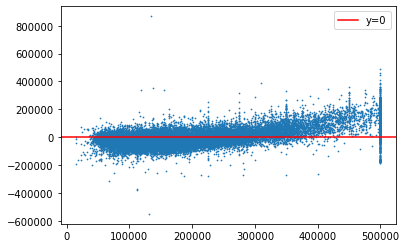

In [12]:
# plot output v error
plt.scatter(y, y_residuals, 0.5)
plt.axhline(y=0, color="red", label="y=0")
plt.legend()
plt.show()

#### LinearRegression Results

In [13]:
print("Train score:", train_score)
print("\nTest score:", test_score)

Train score: 0.6480652983843451

Test score: 0.6407250621624232


The Linear Regression model resulted in a score that is not quite what we were looking for.  Looking at the residual plot, we can make out a gradual positive slope.  There is not necessarily a pattern here, which is good, but not all values are spread evenly on `y = 0`.

***

### PolynomialRegression

In [14]:
# imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [48]:
# create and fit polynomial model
poly_fit = PolynomialFeatures(include_bias=False)
pr = LinearRegression()
poly_reg = make_pipeline(cub_fit, pr)
poly_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [49]:
# get predictions
y_poly_pred = poly_reg.predict(X)

In [50]:
# get residuals
y_poly_residuals = y - y_poly_pred

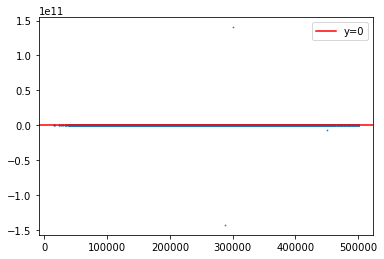

In [51]:
# plot output v error
plt.scatter(y, y_poly_residuals, 0.5)
plt.axhline(y=0, color="red", label="y=0")
plt.legend()

In [20]:
# get train score
poly_train_score = poly_reg.score(X_train, y_train)

In [21]:
# get test score
poly_test_score = poly_reg.score(X_test, y_test)

#### PolynomialRegression Results

In [22]:
print("Polynomial train score:", poly_train_score)
print("Polynomial test score:", poly_test_score)

Polynomial train score: 0.7170870478361367
Polynomial test score: -493903853.43303293


This score does not make sense.  On a scale of 0-1, it should be impossible to get a -493 million value.  Not only that, there is a clear pattern; all but what looks like 4 values are on `y = 0`.  Outliers must be playing a large role in this model. 

***

### f_regression

In [23]:
# imports
from sklearn.feature_selection import f_regression, SelectKBest

In [24]:
# create and fit f_regression model
f_feature_selection = SelectKBest(score_func=f_regression, k=3)
f_lm = LinearRegression()
f_lm_pipeline = make_pipeline(f_feature_selection, f_lm)
f_lm_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=3,
                             score_func=<function f_regression at 0x00000227D0CFF048>)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [25]:
# get predictions
f_pred = f_lm_pipeline.predict(X)

In [26]:
# get residuals
residuals = y - f_pred

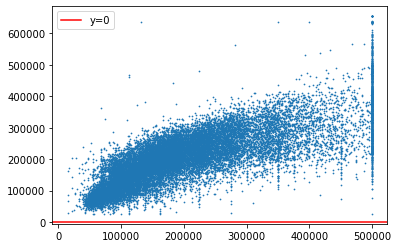

In [27]:
# plot output v error
plt.scatter(y, f_pred, 0.5)
plt.axhline(y=0, color="red", label="y=0")
plt.legend()

In [28]:
# get train score
f_train_score = f_lm_pipeline.score(X_train, y_train)

In [29]:
# get test score
f_test_score = f_lm_pipeline.score(X_test, y_test)

#### f_regression results

In [30]:
print("f_regression train score:", f_train_score)
print("f_regression test score:", f_test_score)

f_regression train score: 0.5851189268348991
f_regression test score: 0.5929529213427795


Here, using 3 features, we get a graph that is similar to the Linear Regression graph, but most of the data is nowhere near `y = 0`.  The scores are also less than Linear Regression so this model is not acceptable.

***

### Mutual_Info_Regression

In [31]:
# imports
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [32]:
# create and fit mutual_info_regression model
mi_feature_selection = SelectKBest(score_func=mutual_info_regression, k=4)
mi_lr = LinearRegression()
mi_pipeline = make_pipeline(mi_feature_selection, mi_lr)
mi_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=4,
                             score_func=<function mutual_info_regression at 0x00000227D700CDC8>)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [33]:
# get predictions
mi_pred = mi_pipeline.predict(X)

In [34]:
# get residuals
mi_residuals = y - mi_pred

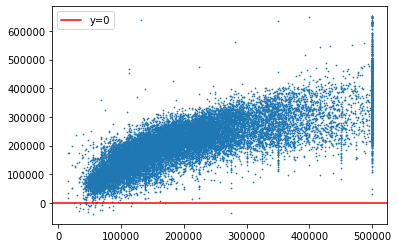

In [35]:
# plot output v error
plt.scatter(y, mi_pred, 0.5)
plt.axhline(y=0, color="red", label="y=0")
plt.legend()
plt.show()

In [36]:
# get train score
mi_train_score = mi_pipeline.score(X_train, y_train)

In [37]:
# get test score
mi_test_score = mi_pipeline.score(X_test, y_test)

#### mutual_info_regression results

In [38]:
print("mutual_info_regression train score:", mi_train_score)
print("mutual_info_regression test score:", mi_test_score)

mutual_info_regression train score: 0.5968991106307453
mutual_info_regression test score: 0.6044259038107189


Plotting the residuals of mutual_info_regression, we find the the residuals are similar to those in f_regression, although they are closer to `y = 0`.  Most of the points are over that line, meaning there is little spread, and the data seems to have a positive curve to it, establishing a pattern.  This plot, along with scores lower than those using Linear Regression show that this model is not a good model.

***

### K-Nearest-Neighbors

In [39]:
# imports
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# create and fit model
st_scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors = 5, weights = "uniform")
k_pipeline = make_pipeline(st_scaler, knn)
k_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [41]:
# get predictions
k_pred = k_pipeline.predict(X)

In [42]:
# get residuals
k_residuals = y - k_pred

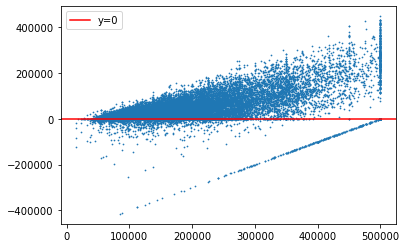

In [43]:
# plot output v error
plt.scatter(y, k_residuals, 0.5)
plt.axhline(y=0, color="red", label="y=0")
plt.legend()
plt.show()

In [44]:
# get train score
k_train_score = k_pipeline.score(X_train, y_train)

In [45]:
# get test score
k_test_score = k_pipeline.score(X_test, y_test)

#### K-Nearest-Neighbors results

In [46]:
print("K-Nearest-Neighbors train score:", k_train_score)
print("K-Nearest-Neighbors test score:", k_test_score)

K-Nearest-Neighbors train score: 0.20792840662798015
K-Nearest-Neighbors test score: 0.02593800978792822


We tried K-Nearest-Neighbors in the exercise, but I wanted to see if I could improve it using different methods.  This was not the case as the scores are worse here than there.  The residual plot is interesting.  There is a positive slope and some of the data is beneath `y = 0`, but not enough to evenly spread the points.  This model is not a strong model, especially not on the test set.

***

## Summary

In [47]:
print("Linear train score:", train_score)
print("Linear test score:", test_score)
print("\nPolynomial train score:", poly_train_score)
print("Polynomial test score:", poly_test_score)
print("\nf_regression train score:", f_train_score)
print("f_regression test score:", f_test_score)
print("\nmutual_info_regression train score:", mi_train_score)
print("mutual_info_regression test score:", mi_test_score)
print("\nK-Nearest-Neighbors train score:", k_train_score)
print("K-Nearest-Neighbors test score:", k_test_score)

Linear train score: 0.6480652983843451
Linear test score: 0.6407250621624232

Polynomial train score: 0.7170870478361367
Polynomial test score: -493903853.43303293

f_regression train score: 0.5851189268348991
f_regression test score: 0.5929529213427795

mutual_info_regression train score: 0.5968991106307453
mutual_info_regression test score: 0.6044259038107189

K-Nearest-Neighbors train score: 0.20792840662798015
K-Nearest-Neighbors test score: 0.02593800978792822


None of the models I tried resulted in scores at or above .80 on the test set.  The model with the highest score on the test set were the [linear regression model](#LinearRegression) model.

Because the training and test scores were often similar, no matter how low they were, output versus error was plotted to help display the scatter in the residuals. 

Question:

> Which one do you think is the best?

Answer:

> The Linear Regression model seems to be the best model. It has the highest score and the residual plot, while it might not have a perfect uniform spread, has a spread that seems equal.  The polynomial model has the most uniform scatter plot of residuals.  However, the score, specifically the test score, for the polynomial model is very odd.